import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
## Simple Linear Regression

For Simple Linear Regression, there is one independent variable which is used to predict the dependent variable.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import pyforest

[Dataset]https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
#load the data into the dataframe
df= pd.read_csv("C://Users//Chintu//Downloads//student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Descriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


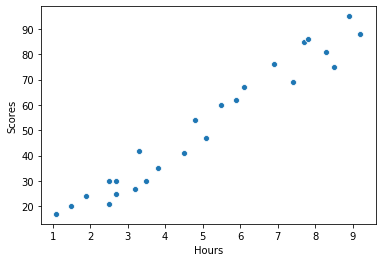

In [4]:
#Plotting a scatterplot to see relationship between the data
ax = sns.scatterplot(x="Hours", y="Scores", data=df)
plt.show()

From the above plot, we can see that there is strong linear relationship between the dependent and the independent variable

In [5]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['Hours'],df['Scores'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.976


The Pearson's Correlation Co-efficient tells us that the variables indeed have a very strong linear relationship between them.

Preparing the Data:
Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". 
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. 
In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. 
Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. 
To extract the attributes and labels, execute the following script:

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#The above script splits 80% of the data to training set while 20% of the data to test set. 
#The test_size variable is where we actually specify the proportion of test set

In [8]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Intercept b
print(regressor.intercept_)

2.018160041434683


In [10]:
#Slope M
print(regressor.coef_)

[9.91065648]


In [11]:
#Making Predictions. 
y_pred = regressor.predict(X_test)

In [12]:
#Comparing actual and predicted values. 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r^2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
r^2:  0.9454906892105356


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of 
all the students i.e. 51.48. This means that our model performed well.

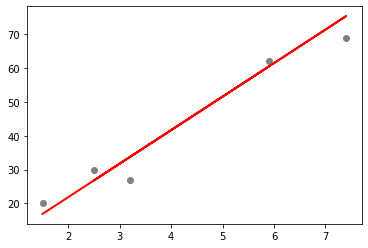

In [15]:
#Let's plot our straight line with the test data :
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()